# I Pakartoniniai neuroniniai tinklai

## Temos

<code>**1  : Įvairūs darbo su tekstiniais duomenimis metodai**</code><br>
<code>**2  : Sekos modeliavimas su RNN**</code><br>
<code>**3  : Įvairių tipų sekos modeliavimo užduotys**</code><br>
<code>**4  : Atgalinis skaičiavimas (backpropagation) per laiką**</code><br>
<code>**5  : LSTM - ilgalaikė trumpalaikė atmintis**</code><br>
<code>**6  : RNN klasifikavimui: Many to One Word RNN**</code><br>
<code>**7  : Sentimentų klasifikatorius (PyTorch)**</code><br>

In [1]:
#TODO approx 2:20

Tai specialaus tipo neurininiai tinklai kurie gali modeluoti duomenų serijas. Vienas turbūt idomesniu pavyzdžių būtų NLP (natural language processing), galima galvoti apie dokumentą kaip apie žodžių serija, ir kiekvienas žodis taip pat yra simbolių serija. Aptarsime šioje paskaitoje kaip šie NN veikia ir paskaitos pabaigoje pamėginsime `pritaikyti RNN dokumentų klasifikacijos problemai spręsti`. Žinoma jeigu jus domina darbas su tekstu RNNs nėra vienintelis būdas dirbti su teksto problemomis. Todėl paskaitos eigoje paminėsiu trumpai kelis kitus būdus šioms problemoms spręsti. Aptarsime skirtingas `sekos modeliavimo technika`s nes yra daugiau nei tekstos klasifikcija. Pasižiūrėsime į `modifikuota atgalinį skaičiavimą` pritaikyta šio tipo neuroniniams tinklams. Akcentuosiu `LTSM` tai specifinė celė skirta RNNs kurios padeda apdoroti ilgas sekas. Susipažinsime su technika kuomet norime klasifikuoti tekstą pritaikytdami `many-to-one` metodą.

## Įvairūs darbo su tekstiniais duomenimis metodai

### Bag of words

Klasikinis priėmimas prie teksto klasifikavimo problemos `bag of words model`. Mes tik apžvelksime čia technika bet nesigilinsime į šio metodo veikimo aspektus.

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np

In [14]:
x1 = 'The sun is shinning'
x2 = 'The weather is sweet'
x3 = 'The sun is shinning, the weather is sweet, and one and one is two '

In [15]:
y = [0, 1, 0]

Šio metodo esmė yra kad mes konvertuojame tekstą į lentelė. Šio metodo trukumas tas kad prarandame sekų ryšį tekste tarp žodžiu. Turime trys duomenų pavyzdžius, tris sakinius x1, x2, x3. Ir turime kažkokia y kategorijų etiketes. Pirmas žingsnis yra sukurti žodyną, panašu dalyką darysime ir dirbdami su RNN. Šis žodynas saugo visus galimus <code>**unikalius žodžius iš duomenų rinkinio**</code>. Visiem žodžiams duodame indeksą tam kad turėtu kažkokį žemėlapį nuo žodžių prie skaičių (indeksų). 

In [16]:
vocabulary = {
    'and'     : 0,
    'is'      : 1,
    'one'     : 2,
    'shining' : 3,
    'sun'     : 4,
    'sweet'   : 5,
    'the'     : 6,
    'two'     : 7,
    'weather' : 8
}

Sekantis žingsnis yra konvertuoti gryną įvesti paversti į dizaino matrica X, su n duomenų pavyzdžiais ir m savybėmis. Tai jeigu atkreipsite dėmėsi m yra mūsų žodyno ilgis, t.y 9 unikalus žodžiai/savybės, o žodyne esančių žodžių indeksai sutampa su dizaino matricos kolonų indeksais, žodžių dažnumo skaičiuoklis.

In [20]:
X = np.array([
    [0, 1, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 1],
    [2, 3, 2, 1, 1, 1, 2, 1, 1]
])

Galime panaudoti tipinį MLP, ar logistinę regresiją apmokyti klasifikiuoti šiuos įrašus su šiuo `bag of words` duomenų rinkiniu. Tik kaip matote tokio metodo trukumas yra kad mes prarandame žodžių tvarką sakinyje ir nelieka jokio gramatinio ir sintaksinio ryšlumo.

### CNN

Kitas budas dirbti su tekstu yra panaudojant CNN. Mes prieš tai nagrinėjome šiu neuroninių tinklų panaudojimą su vaizdinę medžiagą bet tai gali būti pritaikyta ir su tekstu. Turėsime naudoti specialų CNN atveji taip vadinama <code>**1D CNN**</code>  ir tai gali duoti visai neblogus rezultatus bet tai nėra taip dažnai taikoma kaip RNN teksto klasifikavimo problemai spręsti. 

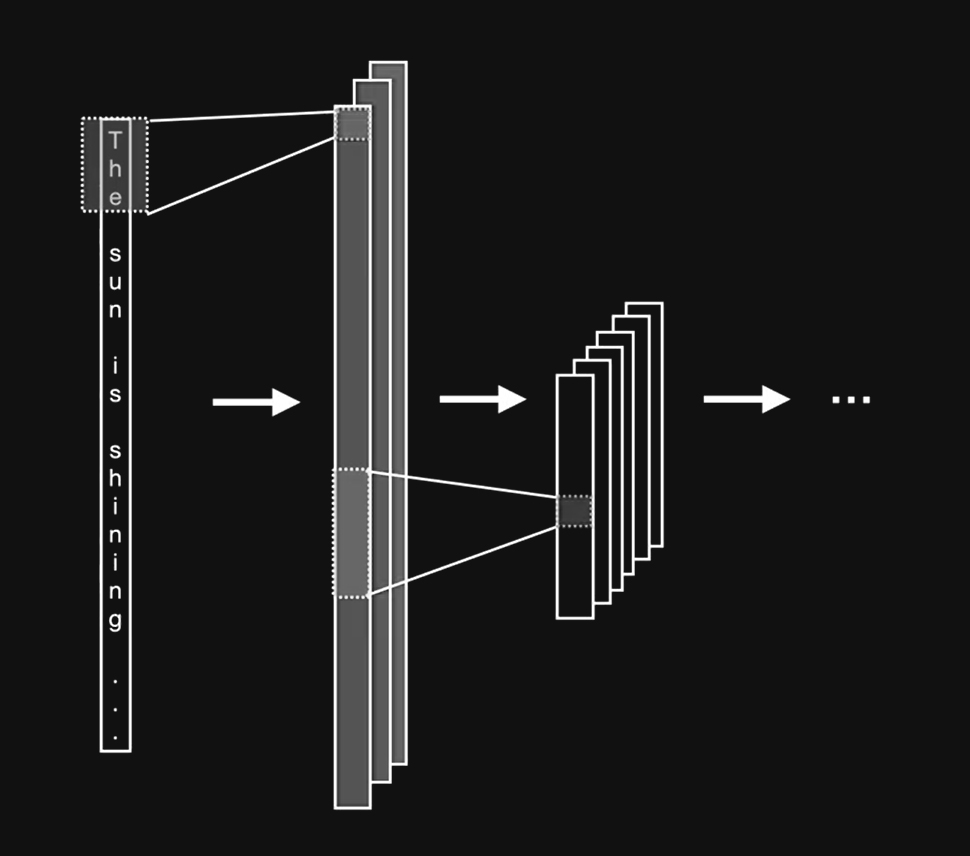

Dirbdami su vaizdais turėjome 2D konvoliucijas, o dabar turime 1D konvoliucijas ir vieną ilgą vektorių kuriame yra mūsų žodžiai paversti tarkime į individualių raidžių simbolių 

### Transformatoriai

Tai modernesnė technika ir apie pačius transformatorius mes kalbėsimės išsamiau šiek tiek vėliau. 2014 metais buvo sukurta technika kuri papildė RNN dėmesio mechanizmais ir kažkas sugalvojo kad galbūt reikėtu pamėginti atsisakyti pačiu RNN ir panaudoti vien tik dėmesio mechanizmus ir tai davė dar geresnius rezultatus, taip ir atsirado šie taip vadinami transformatoriai. `bag of words` labai gerai dirba su mažo apimties duomenų rinkiniais, RNN reikia jau gerokai didesnių duomenų rinkinių, o transformatorias reika dar didesnių nei reikia RNN. Tipiniu atveju kai tyrėjai dirba su transformatoriais tai naudojami milijardai sakinių įvestis ir treniruojami šie modelia ant šimtų ir tūkstančių GPU branduolių ir tai dar trunka keletą dienų/savaičių ir šis procesas kainuoja beprotiškus pinigus kuriuos gali sau leisti tik didelės kompanijos kaip Google/Amazon/Meta ir pan.

## Sekos modeliavimas su RNN

## Įvairių tipų sekos modeliavimo užduotys

## Atgalinis skaičiavimas (backpropagation) per laiką

## LSTM - ilgalaikė trumpalaikė atmintis

## RNN klasifikavimui: Many to One Word RNN

## Sentimentų klasifikatorius (PyTorch)